In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resnet-50/tensorflow2/classification/1/saved_model.pb
/kaggle/input/resnet-50/tensorflow2/classification/1/variables/variables.index
/kaggle/input/resnet-50/tensorflow2/classification/1/variables/variables.data-00000-of-00001
/kaggle/input/flower-classification/val.csv
/kaggle/input/flower-classification/classname.txt
/kaggle/input/flower-classification/train.csv
/kaggle/input/flower-classification/val/classname.txt
/kaggle/input/flower-classification/val/astilbe/24885587_7707cedf58_c.jpg
/kaggle/input/flower-classification/val/astilbe/3707713380_5c332b9984_c.jpg
/kaggle/input/flower-classification/val/astilbe/18836736090_17cc0f2f37_c.jpg
/kaggle/input/flower-classification/val/astilbe/2836859640_381ea2450c_c.jpg
/kaggle/input/flower-classification/val/astilbe/2653167851_db89709b5c_c.jpg
/kaggle/input/flower-classification/val/astilbe/47943479783_aa44b29eef_c.jpg
/kaggle/input/flower-classification/val/astilbe/20164440_97ec1fd3d6_c.jpg
/kaggle/input/flower-classification/

In [3]:
# imports
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import pathlib
from tensorflow.keras.applications import resnet
from tensorflow.keras.optimizers import Adam
import cv2
import shutil
import glob 
import matplotlib.pyplot as plotter
import seaborn as sns
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

# set batch size
batch_size = 64

# get training dataset into pandas dataframe
df_train = '/kaggle/input/flower-classification/train'
pd.DataFrame(os.listdir(df_train),columns=['Files_Name'])

# get testing dataset into dataframe too
df_test = '/kaggle/input/flower-classification/val'
pd.DataFrame(os.listdir(df_test),columns=['Files_Name'])


# TODO: LATER => download working directory as zip file

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Files_Name
0,astilbe
1,black_eyed_susan
2,bellflower
3,classname.txt
4,common_daisy
5,coreopsis
6,dandelion
7,water_lily
8,carnation
9,calendula


<Axes: xlabel='Label', ylabel='count'>

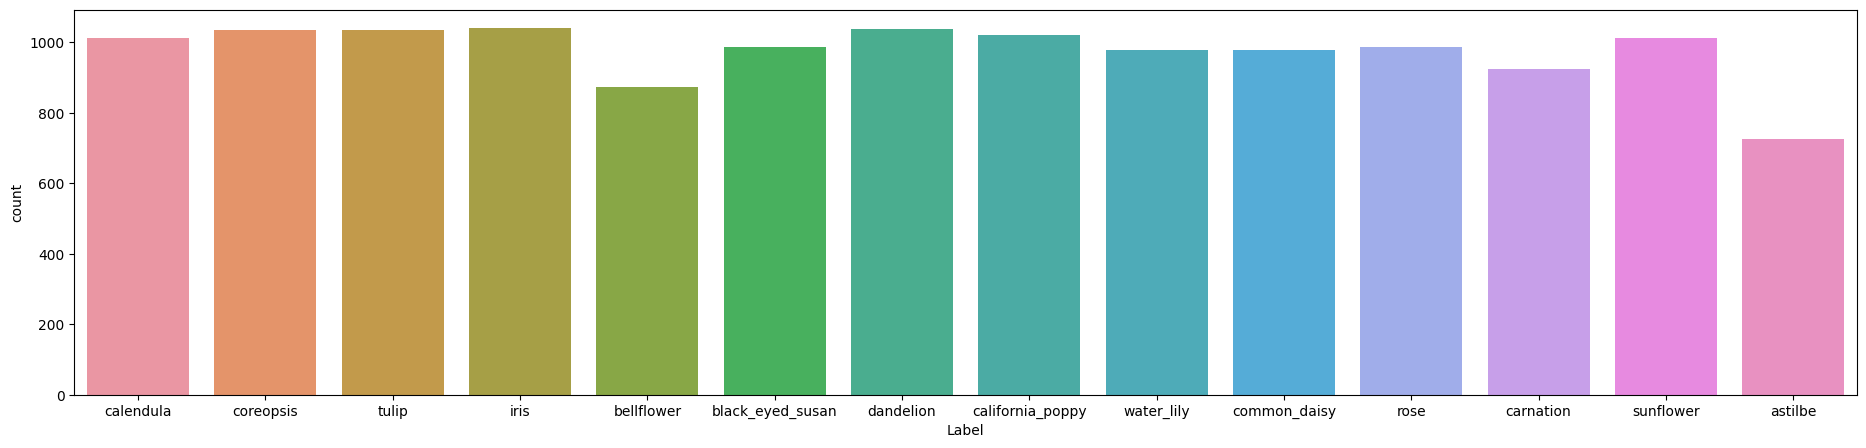

In [4]:
# get files and labels
files = [i for i in glob.glob(df_train + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
# dataframe

# visualize data
plt.figure(figsize=(23,5))
sns.countplot(x= dataframe["Label"])

Found 13642 files belonging to 14 classes.
Using 10914 files for training.
Found 98 files belonging to 14 classes.
Using 19 files for validation.


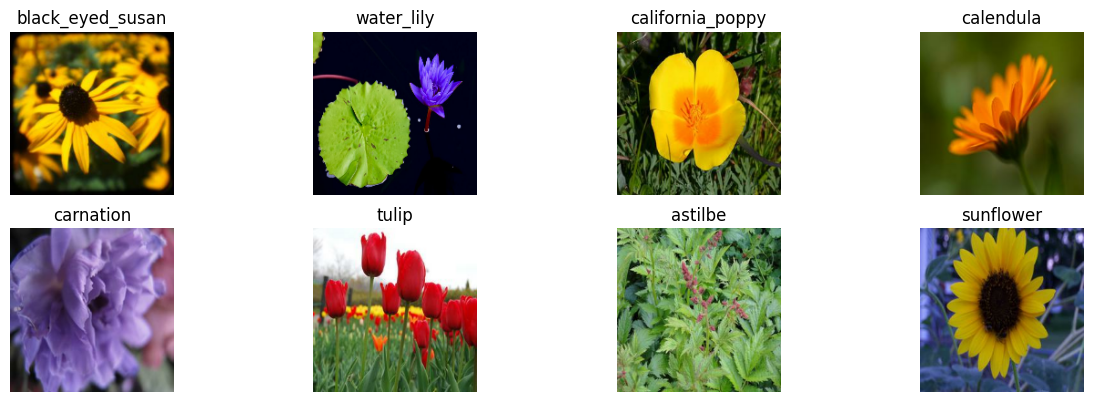

In [5]:
train_data_dir = df_train
val_data_dir = df_test

batch_size = 32
target_size = (180,180)
validation_split = 0.2
train = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

class_names = train.class_names
class_names

plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
# create model
dnn_model = Sequential()

imported_model = resnet.ResNet50(
                    include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg', 
                    classes=14,
                    weights='imagenet')

for layer in imported_model.layers:
        layer.trainable = False

dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(14, activation='softmax'))

dnn_model.summary()

dnn_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 14)               7182      
 pper)                                                           
                                                                 
Total params: 24,643,982
Trainable params: 1,056,270
Non-

In [7]:
# train model
history = dnn_model.fit(
  train,
  validation_data=validation,
  epochs=10
)

dnn_model.save('resnet50_model-10')

Epoch 1/10
342/342 [==============================] - 37s 74ms/step - loss: 0.6238 - accuracy: 0.8060 - val_loss: 0.2897 - val_accuracy: 0.8421
Epoch 2/10
342/342 [==============================] - 23s 65ms/step - loss: 0.2871 - accuracy: 0.9047 - val_loss: 0.2798 - val_accuracy: 0.8947
Epoch 3/10
342/342 [==============================] - 23s 66ms/step - loss: 0.1855 - accuracy: 0.9374 - val_loss: 0.1807 - val_accuracy: 0.8947
Epoch 4/10
342/342 [==============================] - 23s 68ms/step - loss: 0.1479 - accuracy: 0.9489 - val_loss: 0.4396 - val_accuracy: 0.8947
Epoch 5/10
342/342 [==============================] - 24s 69ms/step - loss: 0.0925 - accuracy: 0.9702 - val_loss: 0.2580 - val_accuracy: 0.8421
Epoch 6/10
342/342 [==============================] - 24s 70ms/step - loss: 0.0768 - accuracy: 0.9749 - val_loss: 0.5587 - val_accuracy: 0.8421
Epoch 7/10
342/342 [==============================] - 24s 68ms/step - loss: 0.0707 - accuracy: 0.9757 - val_loss: 0.3301 - val_accuracy: